# Randomiser for TC1031 Problem Situation

This notebook intends to work as a log generator for the TC1031 Problem Situation.

The original log file had a couple of issues like IPv4s going over the 255 limitation per octet and no repeated IP addresses, which makes it impossible to generate relations (for graph-like problems). This also made the BST kinda boring as no address was found more than once in the text file.

Feel free to modify anything as you see fit.

For your convenience, a couple of parameters are set near the beginning for you to play with.

In [1]:
import numpy as np
import seaborn as sns # for plotting distributions
from numpy.random import default_rng

## Parameter setup

In [2]:
n_samples = 13370  # total _likely_ unique IPs
n_xtra_samples = 16807 - 13370  # number of repeated IPs
filename = 'bitacora' # file name without extension

# Date options
monthoptions = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct']
maxday = 31  # high endpoint for the random integer function, excluded in order to avoid inexistent dates

# Event descriptions
msgoptions = ['Failed password for admin', 'Illegal user', 'Failed password for illegal user guest',
             'Failed password for illegal user guest', 'Failed password for illegal user root']

---

## The code

In [3]:
rng = default_rng()  # initialize random number generator

We start by generating a `n_samples` $\times$ 4 vector $\sim U$ where $U$ is the Uniform distribution.

Then we choose `n_extra_samples` from those `n_samples` and use them to extend our IP addresses.
The distribution is plotted below.

<AxesSubplot:>

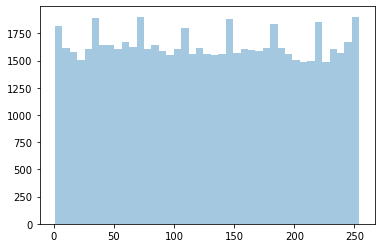

In [4]:
thenumbers = rng.integers(1, 255, (n_samples, 4))
theextras = rng.choice(thenumbers, n_xtra_samples)
thenumbers = np.vstack((thenumbers, theextras))
sns.distplot(thenumbers, kde=False)

Then let's generate the ports. Ideally it would be a 16-byte int, but we need to generate possible relations to use in a graph so let's cap that to something **smaller** than `n_samples` + `n_xtra_samples`. Let's say 10,000.

<AxesSubplot:>

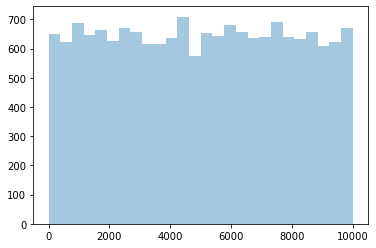

In [5]:
theports = rng.integers(0, 10000, n_samples + n_xtra_samples)
sns.distplot(theports, kde=False)

We now convert IPv4 addresses from integer numbers to strings and show the first five entries.

In [6]:
theips = ['.'.join(list((map(lambda x: str(x), thenumbers[i].tolist())))) for i in range(len(thenumbers))]
theips[0:5]

['80.169.79.65',
 '142.248.253.242',
 '143.19.143.159',
 '5.245.203.112',
 '183.79.11.2']

To generate the full adress we now concatenate the ports after a colon, and print the first five addresses

In [7]:
theaddresses = [theips[i] + ':' + str(theports[i]) for i in range(len(thenumbers))]
theaddresses[0:5]

['80.169.79.65:1150',
 '142.248.253.242:2871',
 '143.19.143.159:6043',
 '5.245.203.112:1812',
 '183.79.11.2:84']

Let's generate the timestamps.

For this we again choose uniformly at random integers from 0-23 for hours, and 0-59 for minutes and seconds (since the `integers` method from the _numpy_ generator considers low and high endpoints as inclusive and exclusive, respectively. We use two digits for all three parts.

Then we concatenate them in a single timestamp and print the first five.

In [8]:
thehour = rng.integers(0, 24, n_samples + n_xtra_samples)
themins = rng.integers(0, 60, n_samples + n_xtra_samples)
thesecs = rng.integers(0, 60, n_samples + n_xtra_samples)

thetime = list(map(lambda x, y, z: f'{x:02d}:{y:02d}:{z:02d}', thehour, themins, thesecs))
thetime[0:5]

['12:58:18', '16:19:58', '18:49:57', '09:20:30', '21:30:11']

To generate the dates, we use the same months originally available from `bitacora.txt` and then choose `n_samples` + `n_xtra_samples` to match the number of records previously defined. 

Days are generated from 1 to 30, using two digits to allow for fancy array-like access.

After that, we concatenate both months and days to generate a date timestamp, and print the first five elements in the list.

In [9]:
themonth = rng.choice(monthoptions, n_samples + n_xtra_samples)
thedays = rng.integers(1, maxday, n_samples + n_xtra_samples)
thedate = list(map(lambda x, y: f'{x} {y:02d}', themonth, thedays))
thedate[0:5]

['Sep 23', 'Jul 09', 'Jul 04', 'Oct 17', 'Jul 13']

Let's generate the error messages.
For this we have a list of strings to choose from, and generate the same number of samples than before uniformly at random.

In [10]:
thereason = rng.choice(msgoptions, n_samples + n_xtra_samples)
thereason[0:5]

array(['Failed password for illegal user root', 'Illegal user',
       'Failed password for illegal user guest',
       'Failed password for illegal user guest',
       'Failed password for illegal user guest'], dtype='<U38')

Finally, we concatenate every substring in single string and add a new line character.
The strings are added to a list as it is quite convenient to later dump into a file.

We show the first 10 events.

In [11]:
thelog = list(map(lambda date, time, ip, reason: f'{date} {time} {ip} {reason}\n', thedate, thetime, theaddresses, thereason))
thelog[0:10]

['Sep 23 12:58:18 80.169.79.65:1150 Failed password for illegal user root\n',
 'Jul 09 16:19:58 142.248.253.242:2871 Illegal user\n',
 'Jul 04 18:49:57 143.19.143.159:6043 Failed password for illegal user guest\n',
 'Oct 17 09:20:30 5.245.203.112:1812 Failed password for illegal user guest\n',
 'Jul 13 21:30:11 183.79.11.2:84 Failed password for illegal user guest\n',
 'Jul 24 18:43:58 75.208.238.89:5602 Failed password for illegal user root\n',
 'Oct 07 19:40:10 3.76.32.10:9563 Failed password for illegal user guest\n',
 'Aug 03 02:19:53 237.182.162.251:6483 Failed password for illegal user guest\n',
 'Oct 18 02:41:40 33.116.103.137:162 Failed password for illegal user guest\n',
 'Sep 18 00:45:20 200.40.196.20:8066 Illegal user\n']

---

## File statistics

In [13]:
print(f'Number of events in the log file: {len(thelog)}')
print(f'Number of unique IPs: {np.unique(theips).size}')
print(f'Number of unique ports: {np.unique(theports).size}')
print(f'Number of Unique dates: {np.unique(thedate).size}')

Number of events in the log file: 16807
Number of unique IPs: 13370
Number of unique ports: 8147
Number of Unique dates: 150


Let's save to a file with the chosen file name.

The file has 16808 lines, as the last line is empy to comply with IEEE's POSIX standard.

In [14]:
with open(f'{filename}.txt', 'w') as myfile:
    myfile.writelines(thelog)